# **Datasets**
---

In [1]:
datasets = {"Bank Note Authetication": "https://raw.githubusercontent.com/rmShoeb/Datasets/master/banknote_authentication.csv",
            "Wheat Seeds": "https://raw.githubusercontent.com/rmShoeb/Datasets/master/wheat-seeds.csv",
            "Glass types": "https://raw.githubusercontent.com/rmShoeb/Datasets/master/glass.csv",
            "Thyroid Gland": "https://raw.githubusercontent.com/rmShoeb/Datasets/master/new-thyroid.csv",
            "E-coli": "https://raw.githubusercontent.com/rmShoeb/Datasets/master/ecoli.csv"}
class_names = {"Bank Note Authentication": {"0": "Fake", "1": "Real"},
               "Wheat Seeds": {"1": "Kama", "2": "Rosa", "3": "Canadian"},
               "Glass types": {"1": "building_windows_float_processed",
                               "2": "building_windows_non_float_processed",
                               "3": "vehicle_windows_float_processed",
                               "4": "vehicle_windows_non_float_processed",
                               "5": "containers",
                               "6": "tableware",
                               "7": "headlamps"},
               "Thyroid Gland": {"1": "normal", "2": "hyper", "3": "hypo"},
               "E-coli": {"cp": "cytoplasm",
                          "im": "inner membrane without signal sequence",
                          "pp": "perisplasm",
                          "imU": "inner membrane, uncleavable signal sequence",
                          "om": "outer membrane",
                          "omL": "outer membrane lipoprotein",
                          "imL": "inner membrane lipoprotein",
                          "imS": "inner membrane, cleavable signal sequence"}}

# **Required modules**
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import random
import pprint
%matplotlib inline

# **Helper Functions**
---

**Fetch data**
---

Given the link to the dataset, the function will handle everything to convert it to a pandas dataframe and return that.

In [3]:
def fetchData(linkToFile):
  return pd.read_csv(linkToFile)

**Measure distance**
---

Calculate the distance of two points provided and return it. The function will implement any one of distance measuring algorithms.

In [4]:
def distance(centroid, point):
  '''
  Input:
  centroid  - a tuple that represents a point in a 2D plane and is the center of a class.
  point     - a tuple that represents a point in a 2D plane and feature of a test data.

  Output:
  distance  - the distance between the two given points

  Method:
  Euclidean distance
  '''
  return math.sqrt((centroid[0]-point[0])**2 + (centroid[1]-point[1])**2)

# **Classification area**
---

**The Actual Classifier**
---

In [5]:
def two_feature_classifier(train_data, mode="MEAN"):
  '''
  Input:
  train_data  - a two dimentional numpy array, that contains two features and its corresponding class on each row

  Output:
  classifier  - a dictionary that contains centroids(mean/median) for each class
  '''
  classifier = {}

  for info in train_data:
    #info[0] and info[1] are features
    #info[2] is class of that flower
    if info[2] in classifier:
      classifier[info[2]].append((info[0], info[1]))
    else:
      classifier[info[2]] = [(info[0], info[1])]
  
  #create the actual classifier
  #based on mode (mean/median)
  if mode=="MEAN":
    for class_name, points in classifier.items():
      x_co_ordinates = [x[0] for x in points]
      y_co_ordinates = [y[1] for y in points]
      try:
        classifier[class_name] = (sum(x_co_ordinates)/len(x_co_ordinates), sum(y_co_ordinates)/len(y_co_ordinates))
      except:
        pass
  elif mode=="MEDIAN":
    for this_class in classifier:
      classifier[this_class].sort()
      classifier[this_class] = classifier[this_class][int(len(classifier[this_class])/2)]

  return classifier

**Prediction**
---

In [6]:
def predict_class(feature_value, classifier):
  closest = 100
  for class_name, centroid in classifier.items():
    if distance(centroid, feature_value)<closest:
      closest = distance(centroid, feature_value)
      feature_class = class_name
  
  return feature_class

**Measure Accuracy**
---

In [7]:
def calculate_accuracy(test_data_with_class, classifier):
  correct_prediction = 0
  for flower in test_data_with_class:
    # flower[0] and flower[1] are features
    # flower[1] is the class
    if (flower[2] == predict_class((flower[0], flower[1]), classifier)):
      correct_prediction += 1
    accuracy = (correct_prediction/len(test_data_with_class))*100

  return accuracy

**Simulation**
---

In [10]:
def simulate(dataset, class_header, mode='MEAN'):
  train_set, test_set = train_test_split(dataset, test_size=0.15, random_state=42)
  highest_validation_accuracy = 0

  for x_cor_feature_index in range(4):
    for y_cor_feature_index in range(x_cor_feature_index+1, 4):
      feature_one = column_names[x_cor_feature_index]
      feature_two = column_names[y_cor_feature_index]
      print("Showing results for {} and {}".format(feature_one, feature_two))

      #split
      numpy_dataset = train_set[[feature_one, feature_two, class_header]].to_numpy()
      temp_train_set, validation_set = train_test_split(numpy_dataset, test_size=0.25, random_state=42)

      classifier = two_feature_classifier(temp_train_set, mode)
      pprint.pprint(classifier)
      accuracy = calculate_accuracy(validation_set, classifier)
      print("Accuracy on validation set: {}".format(accuracy))
      if(accuracy > highest_validation_accuracy):
        highest_validation_accuracy = accuracy
        highest_validation_accuracy_feature_one = feature_one
        highest_validation_accuracy_feature_two = feature_two
        best_classifier = classifier
      print("\n")
  print("Best results found for {} and {}".format(highest_validation_accuracy_feature_one, highest_validation_accuracy_feature_two))
  test_set = test_set[[highest_validation_accuracy_feature_one, highest_validation_accuracy_feature_two, class_header]].to_numpy()
  print("Accuracy on test set: {}".format(calculate_accuracy(test_set, best_classifier)))
  print("\n---------------------------------------------------------------------------------\n")

# **Working through the datasets**
---

Bank Note Authetication
   variance of Wavelet Transformed image  ...   "class"
0                                3.62160  ...         0
1                                4.54590  ...         0
2                                3.86600  ...         0
3                                3.45660  ...         0
4                                0.32924  ...         0

[5 rows x 5 columns]


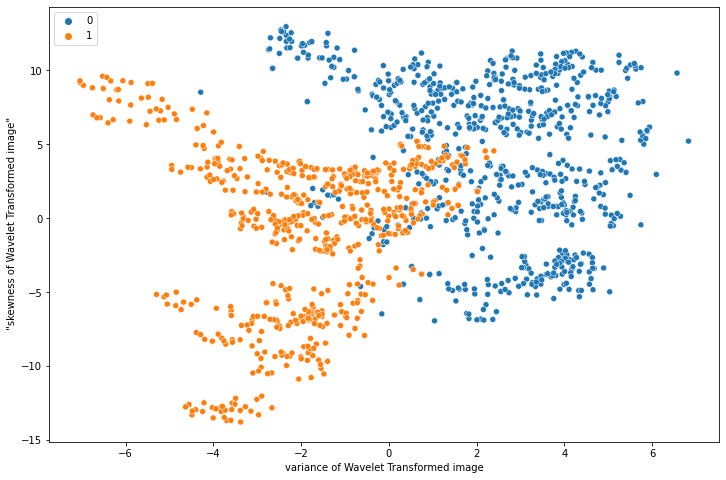

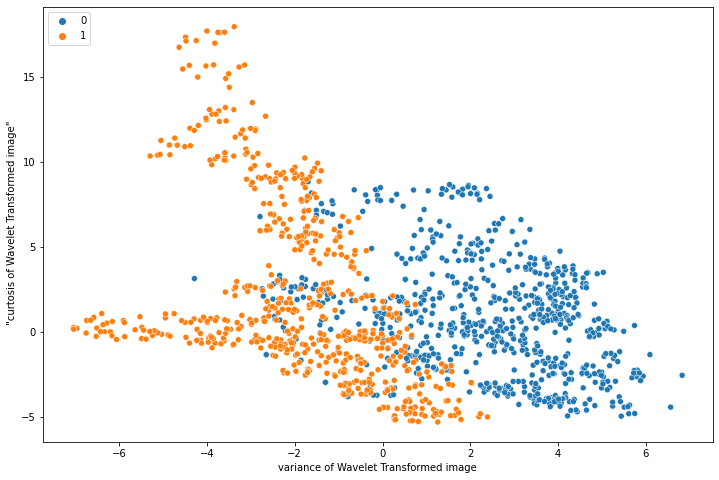

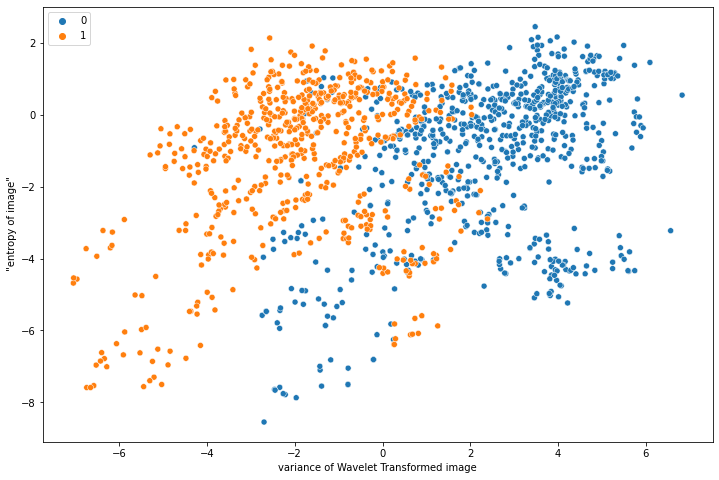

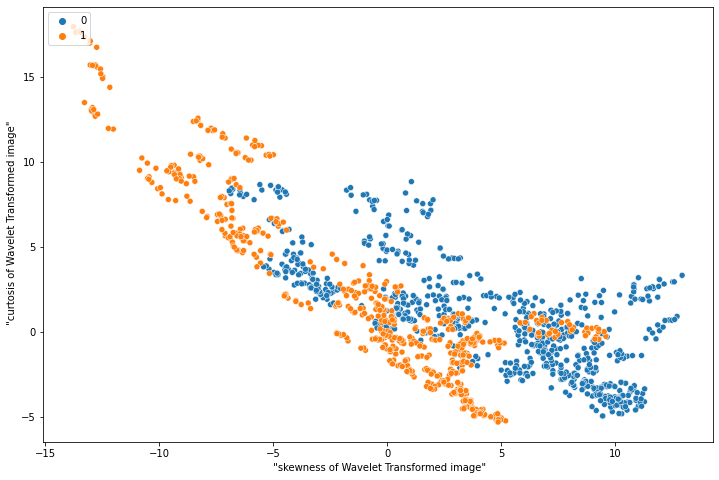

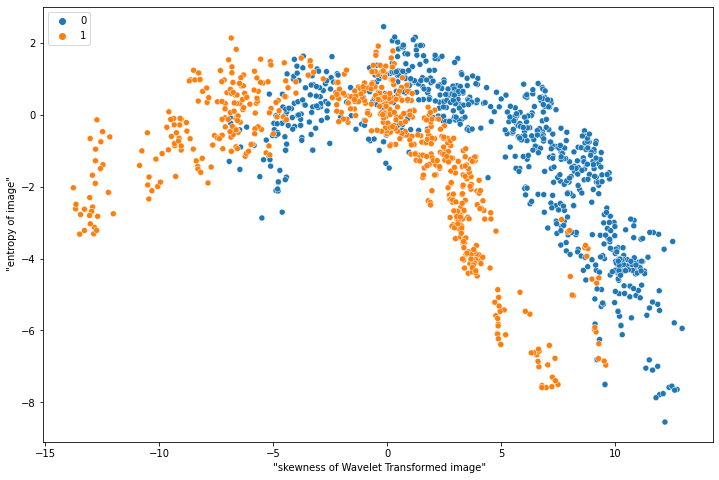

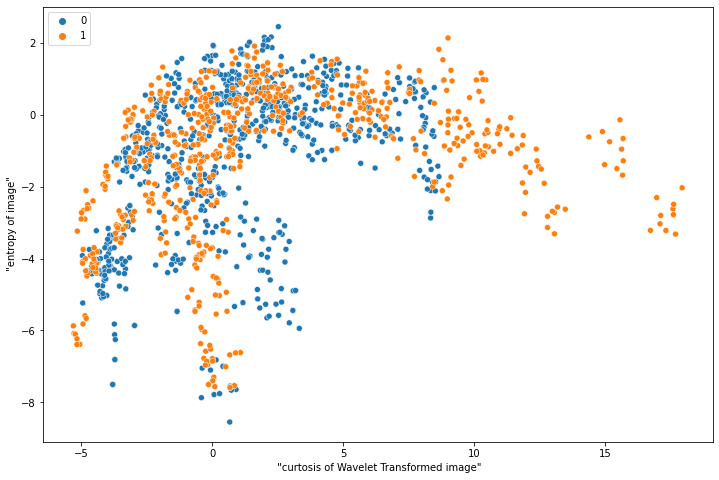

MEAN
Showing results for variance of Wavelet Transformed image and  "skewness of Wavelet Transformed image"
{0.0: (2.2794117502032547, 4.362504349186994),
 1.0: (-1.9057200476439797, -1.191323952879582)}
Accuracy on validation set: 69.86301369863014


Showing results for variance of Wavelet Transformed image and  "curtosis of Wavelet Transformed image"
{0.0: (2.2794117502032547, 0.7544170284552838),
 1.0: (-1.9057200476439797, 2.3986114450261784)}
Accuracy on validation set: 79.7945205479452


Showing results for variance of Wavelet Transformed image and  "entropy of image"
{0.0: (2.2794117502032547, -1.1859627065040659),
 1.0: (-1.9057200476439797, -1.2830302717277484)}
Accuracy on validation set: 88.35616438356165


Showing results for  "skewness of Wavelet Transformed image" and  "curtosis of Wavelet Transformed image"
{0.0: (4.362504349186994, 0.7544170284552838),
 1.0: (-1.191323952879582, 2.3986114450261784)}
Accuracy on validation set: 58.21917808219178


Showing results for  "s

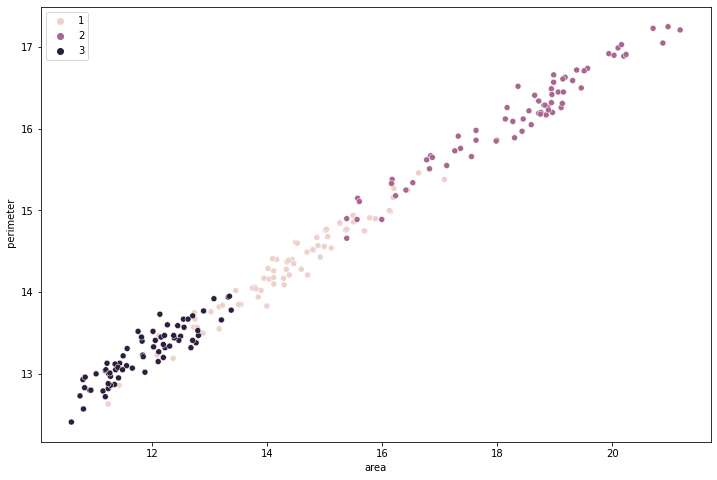

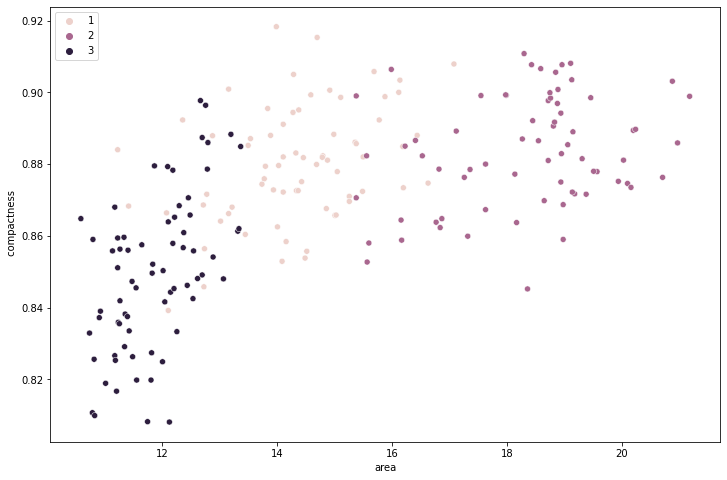

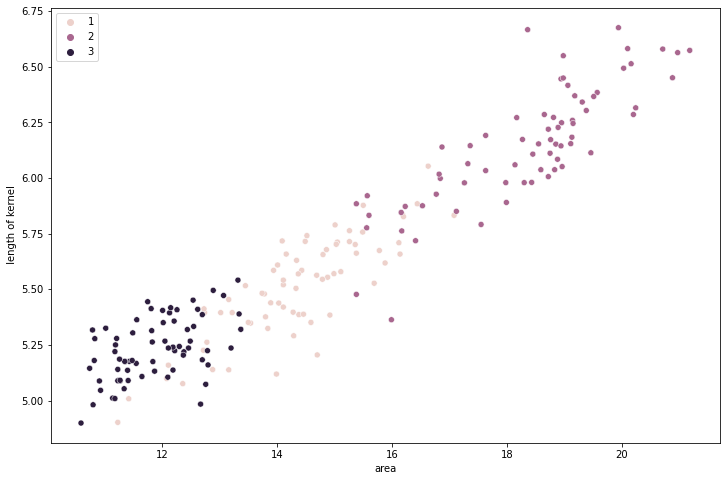

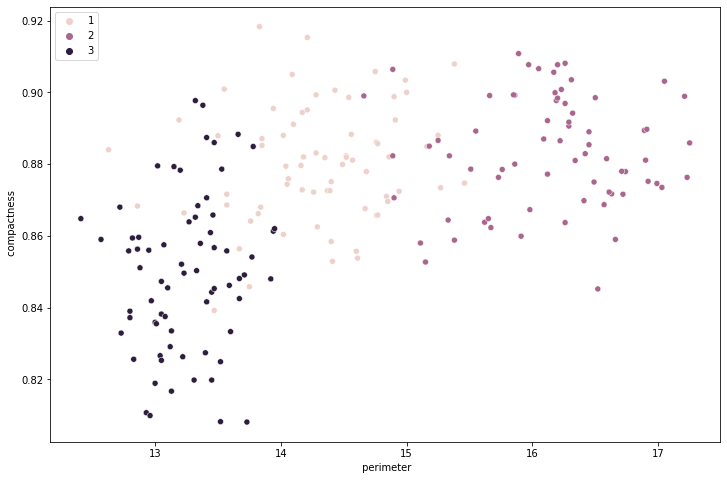

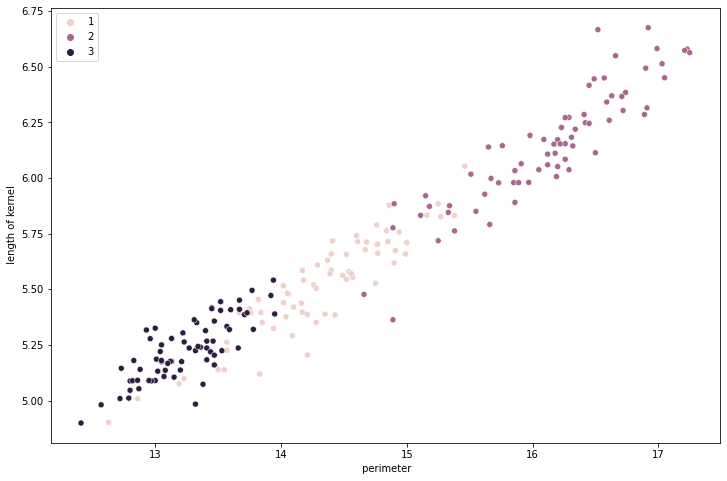

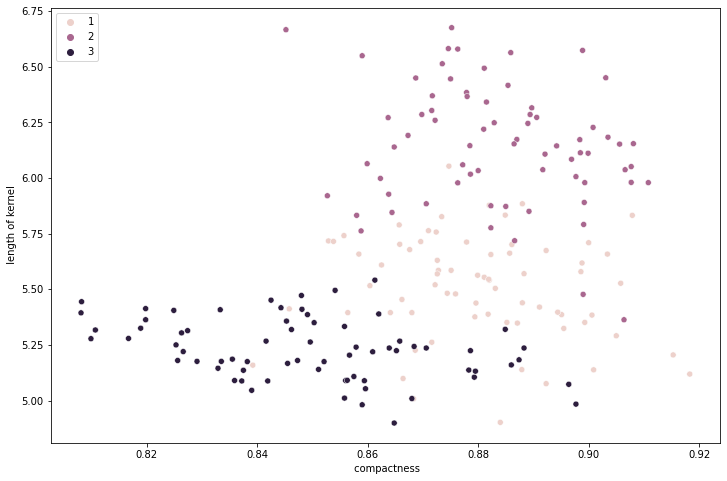

MEAN
Showing results for area and  perimeter
{1.0: (14.301794871794872, 14.272820512820513),
 2.0: (18.405319148936165, 16.152978723404257),
 3.0: (11.81723404255319, 13.24978723404255)}
Accuracy on validation set: 86.66666666666667


Showing results for area and  compactness
{1.0: (14.301794871794872, 0.880651282051282),
 2.0: (18.405319148936165, 0.8851382978723403),
 3.0: (11.81723404255319, 0.845117021276596)}
Accuracy on validation set: 86.66666666666667


Showing results for area and  length of kernel
{1.0: (14.301794871794872, 5.498410256410255),
 2.0: (18.405319148936165, 6.14587234042553),
 3.0: (11.81723404255319, 5.245468085106382)}
Accuracy on validation set: 86.66666666666667


Showing results for  perimeter and  compactness
{1.0: (14.272820512820513, 0.880651282051282),
 2.0: (16.152978723404257, 0.8851382978723403),
 3.0: (13.24978723404255, 0.845117021276596)}
Accuracy on validation set: 88.88888888888889


Showing results for  perimeter and  length of kernel
{1.0: (14.

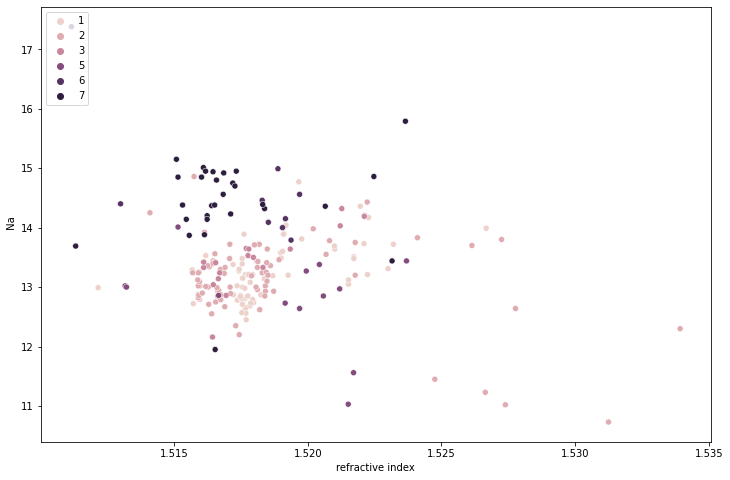

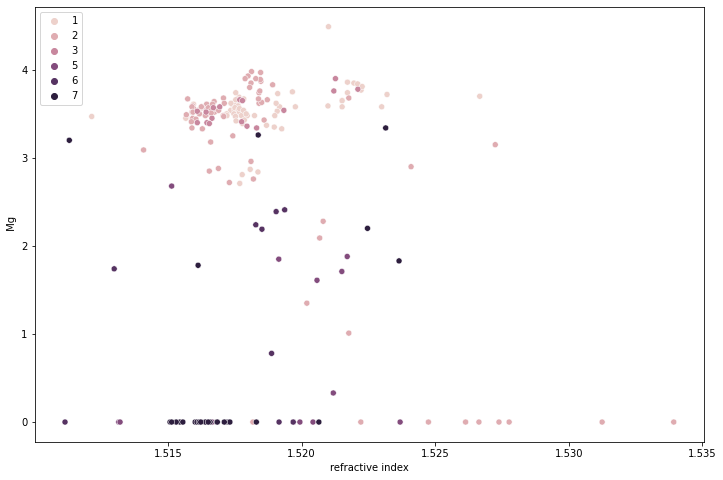

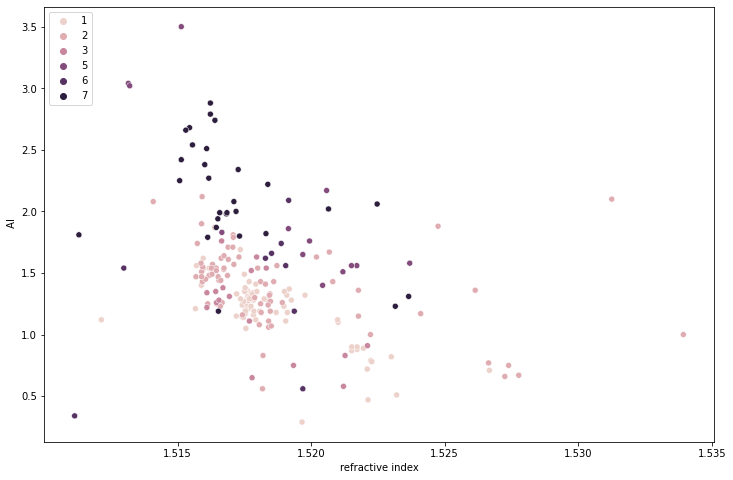

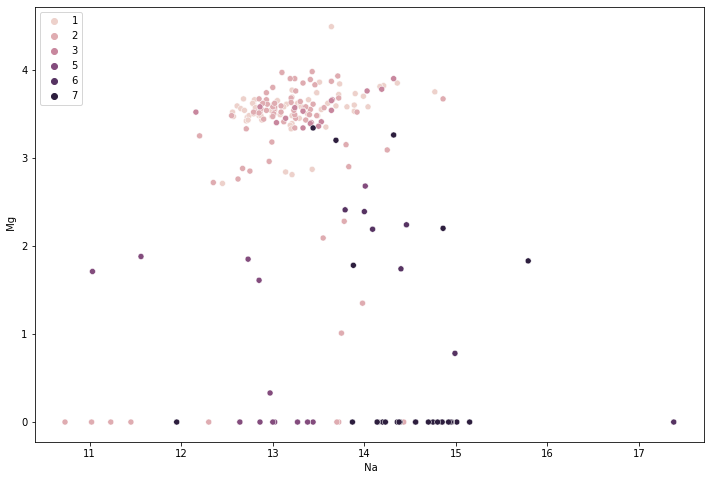

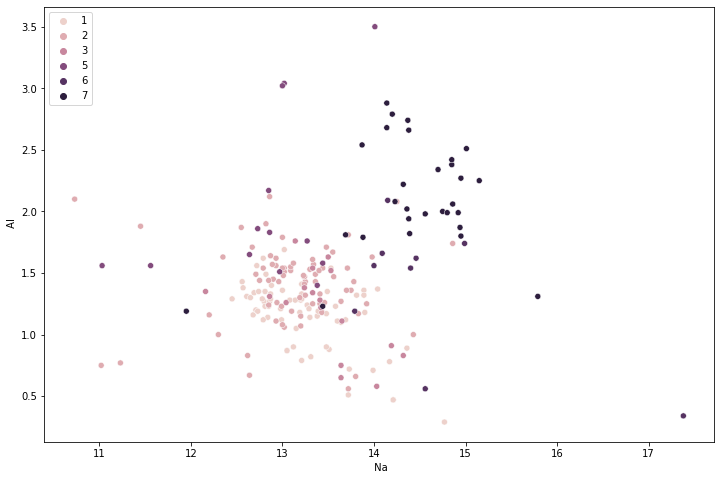

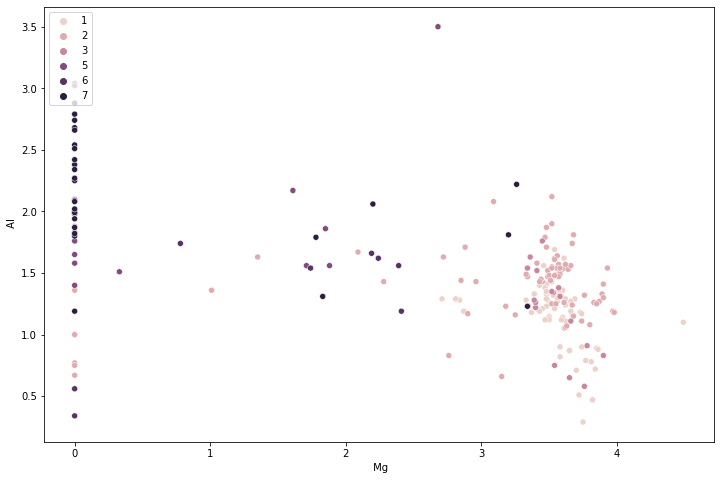

MEAN
Showing results for refractive index and  Na
{1.0: (1.5189777083333331, 13.283124999999998),
 2.0: (1.5185077083333332, 13.15958333333333),
 3.0: (1.5177333333333332, 13.374166666666666),
 5.0: (1.5181133333333332, 12.435),
 6.0: (1.517762, 14.254),
 7.0: (1.5171374999999998, 14.535625)}
Accuracy on validation set: 26.08695652173913


Showing results for refractive index and  Mg
{1.0: (1.5189777083333331, 3.5860416666666666),
 2.0: (1.5185077083333332, 3.0375),
 3.0: (1.5177333333333332, 3.5399999999999996),
 5.0: (1.5181133333333332, 0.9066666666666666),
 6.0: (1.517762, 1.9020000000000004),
 7.0: (1.5171374999999998, 0.75)}
Accuracy on validation set: 30.434782608695656


Showing results for refractive index and  Al
{1.0: (1.5189777083333331, 1.1429166666666668),
 2.0: (1.5185077083333332, 1.4227083333333332),
 3.0: (1.5177333333333332, 1.1633333333333333),
 5.0: (1.5181133333333332, 2.1333333333333333),
 6.0: (1.517762, 1.538),
 7.0: (1.5171374999999998, 2.0568750000000002)}
Ac

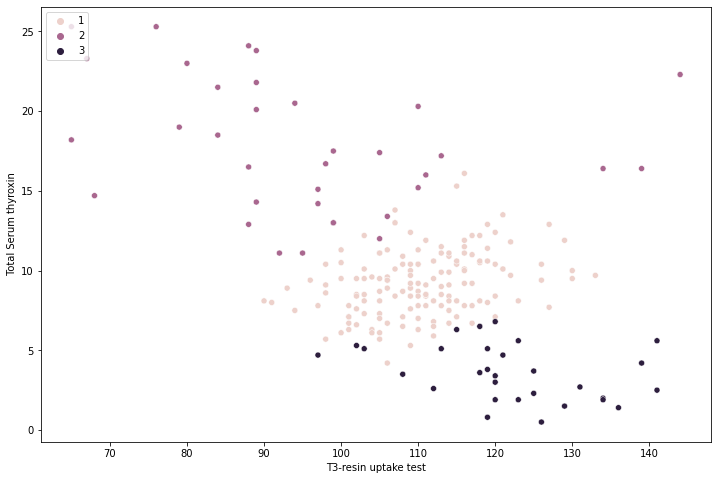

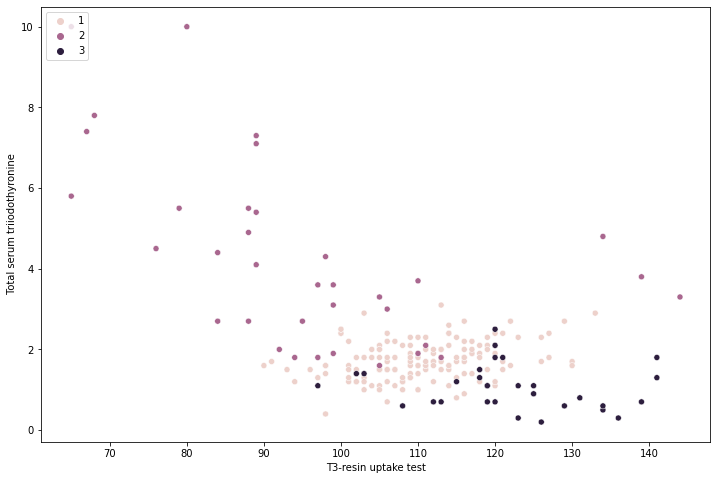

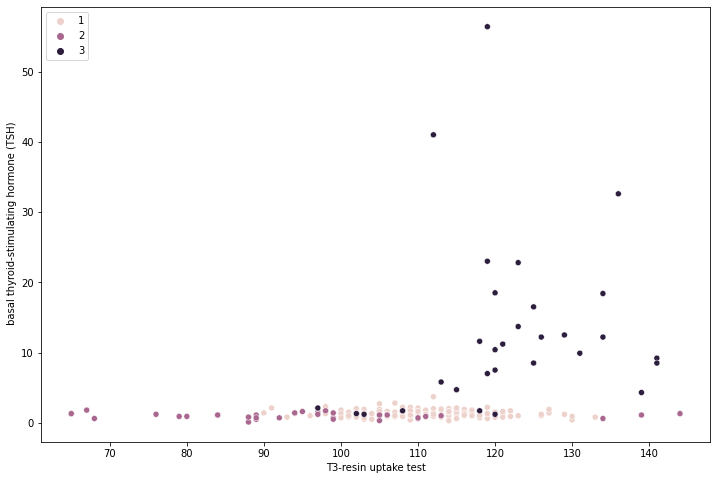

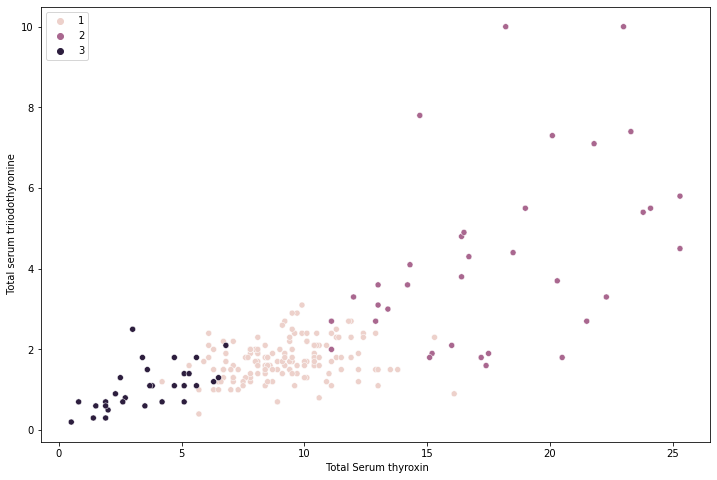

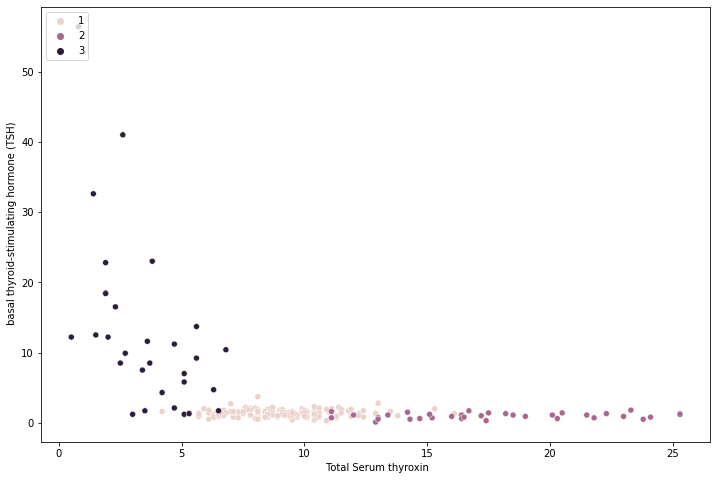

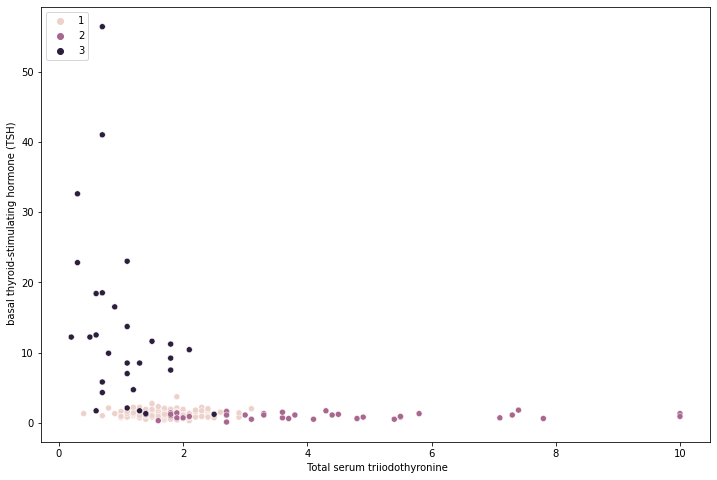

MEAN
Showing results for T3-resin uptake test and  Total Serum thyroxin
{1.0: (109.98979591836735, 9.209183673469388),
 2.0: (95.5, 17.419999999999998),
 3.0: (120.22222222222223, 3.6555555555555554)}
Accuracy on validation set: 60.86956521739131


Showing results for T3-resin uptake test and  Total serum triiodothyronine
{1.0: (109.98979591836735, 1.7418367346938786),
 2.0: (95.5, 4.725),
 3.0: (120.22222222222223, 1.0055555555555555)}
Accuracy on validation set: 54.347826086956516


Showing results for T3-resin uptake test and  basal thyroid-stimulating hormone (TSH)
{1.0: (109.98979591836735, 1.352040816326531),
 2.0: (95.5, 0.9299999999999999),
 3.0: (120.22222222222223, 13.11111111111111)}
Accuracy on validation set: 71.73913043478261


Showing results for  Total Serum thyroxin and  Total serum triiodothyronine
{1.0: (9.209183673469388, 1.7418367346938786),
 2.0: (17.419999999999998, 4.725),
 3.0: (3.6555555555555554, 1.0055555555555555)}
Accuracy on validation set: 91.30434782608

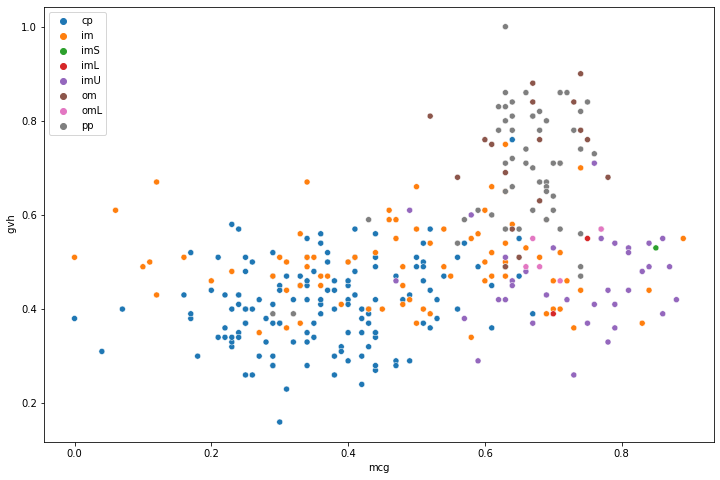

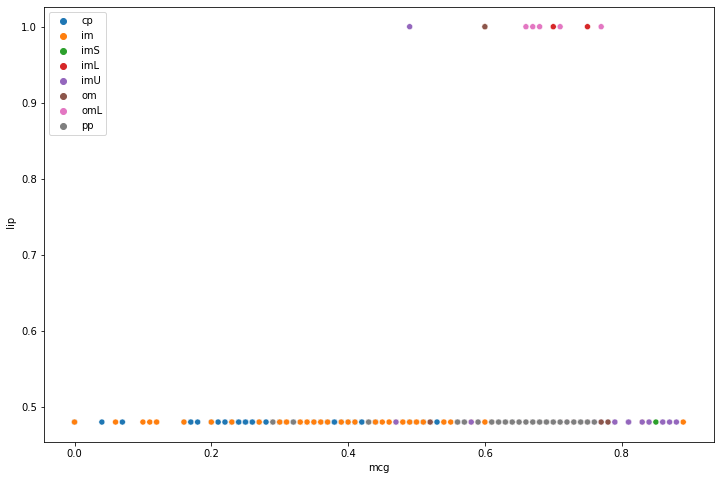

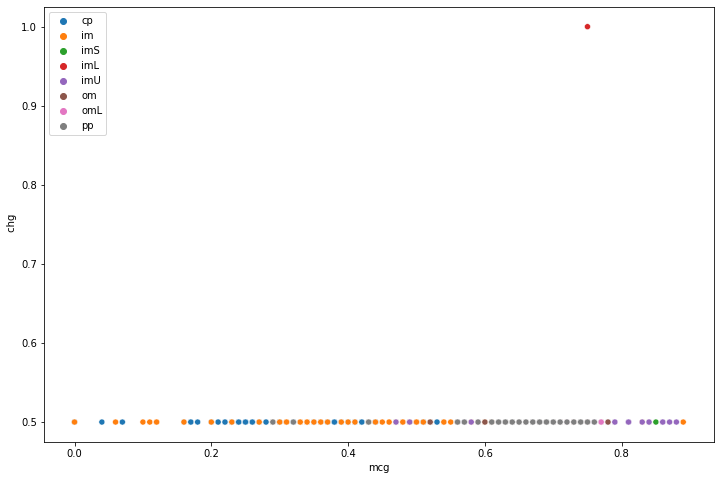

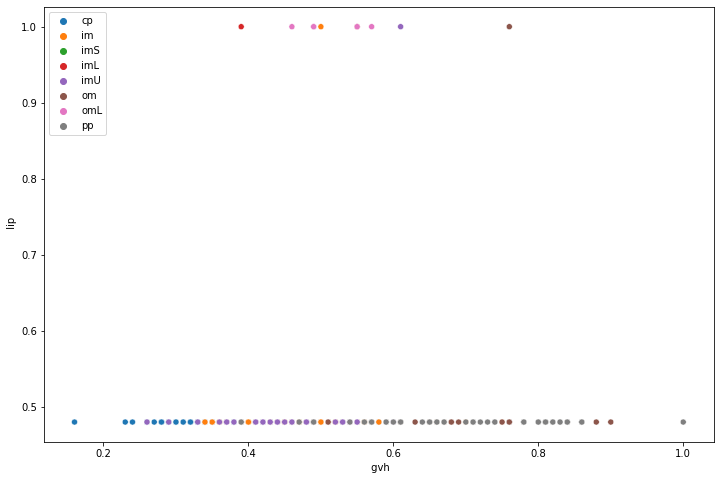

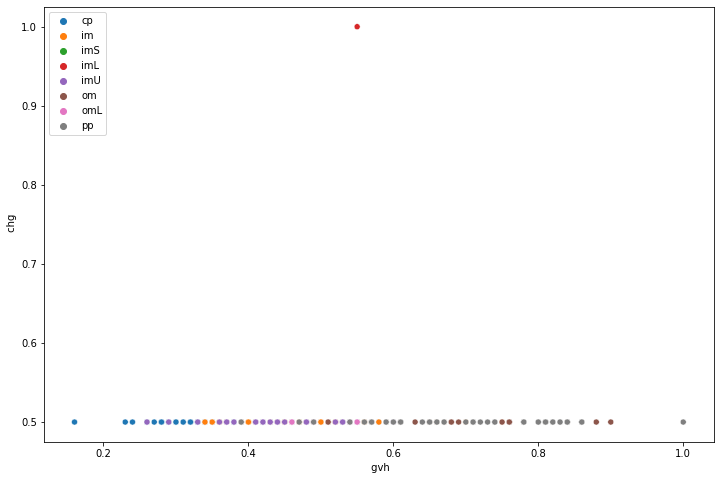

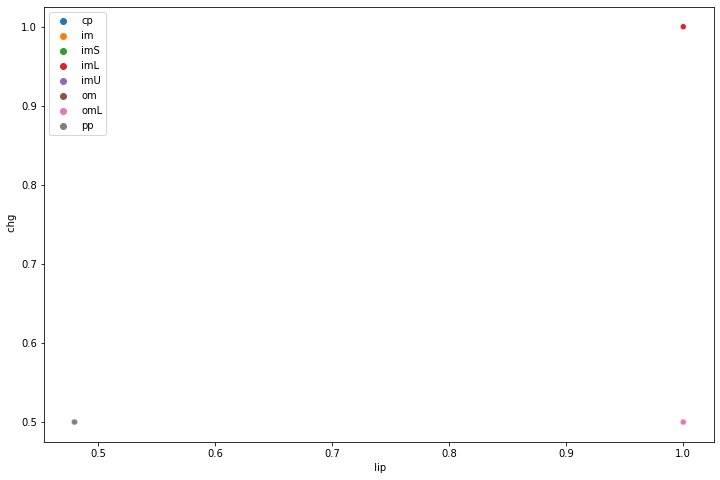

MEAN
Showing results for mcg and  gvh
{'cp': (0.3600000000000001, 0.41134831460674165),
 'im': (0.447391304347826, 0.499782608695652),
 'imL': (0.725, 0.47000000000000003),
 'imS': (0.63, 0.49),
 'imU': (0.7312500000000001, 0.46416666666666656),
 'om': (0.6730769230769231, 0.6823076923076924),
 'omL': (0.7166666666666667, 0.5266666666666667),
 'pp': (0.6502857142857144, 0.6857142857142858)}
Accuracy on validation set: 50.0


Showing results for mcg and  lip
{'cp': (0.3600000000000001, 0.4799999999999995),
 'im': (0.447391304347826, 0.48000000000000037),
 'imL': (0.725, 1.0),
 'imS': (0.63, 0.48),
 'imU': (0.7312500000000001, 0.5016666666666669),
 'om': (0.6730769230769231, 0.5200000000000001),
 'omL': (0.7166666666666667, 1.0),
 'pp': (0.6502857142857144, 0.4800000000000003)}
Accuracy on validation set: 40.27777777777778


Showing results for mcg and  chg
{'cp': (0.3600000000000001, 0.5),
 'im': (0.447391304347826, 0.5),
 'imL': (0.725, 0.75),
 'imS': (0.63, 0.5),
 'imU': (0.7312500000

In [11]:
for dataset_name, link in datasets.items():
  print(dataset_name)
  dataset = fetchData(link)
  print(dataset.head())
  column_names = list(dataset.columns)
  class_names = dataset[column_names[len(column_names)-1]].unique()

  #visualization
  for x_cor_feature_index in range(4):
    for y_cor_feature_index in range(x_cor_feature_index+1, 4):
      plt.figure(figsize=(12,8))
      sns.scatterplot(x=column_names[x_cor_feature_index], y=column_names[y_cor_feature_index], data=dataset, hue=column_names[len(column_names)-1])
      plt.xlabel(column_names[x_cor_feature_index])
      plt.ylabel(column_names[y_cor_feature_index])
      plt.legend(loc='upper left')
      plt.show()

  print("MEAN")
  simulate(dataset, column_names[len(column_names)-1])
  print("MEDIAN")
  simulate(dataset, column_names[len(column_names)-1], mode='MEDIAN')

  print("======================================================================================\n")